# PHYS 3317 -- Finite Differences in 2D

Please hand in this completed notebook before next recitation by uploading it to Blackboard

<em> Vineet Kamat </em>

### Utilities

In [13]:
%pylab inline
from __future__ import division  #get rid of integer division bug

Populating the interactive namespace from numpy and matplotlib


/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
from showmat import showmat #import function for printing matrices

### Formalism

We want to make a finite difference approximation to the 2D Laplacian

$$\nabla^2 \psi(x,y)= \frac{1}{\delta^2}\left[\psi(x+\delta,y)+\psi(x-\delta,y)+\psi(x,y+\delta)+\psi(x,y-\delta)-4\psi(x,y)\right]$$

The most natural representation would be as a rank 4 tensor.  That is if we define

$$\phi=\nabla^2\psi$$

Then $\phi(x,y)$ is some linear combination of $\psi(x^\prime,y^\prime)$.  Unfortunately, most software packages do not deal well with rank 4 tensors.  [For example, you can not use off-the-shelf algorithms to get their Eigenvalues.]

One approach is to number the points on our 2D grid, and think of it as a 1D list.  For example, imagine we have a $3\times 3$ grid:

In [81]:
mesh=arange(9,dtype=integer).reshape(3,3)
mesh

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

These numbers will label the points so that

$$ \begin{array}{c}
\psi_0=\psi(x=0,y=0)\cr \psi_1=\psi(x=1,y=0)\cr \psi_2=\psi(x=2,y=0)\cr \psi_3=\psi(x=0,y=1)\cr
\psi_4=\psi(x=1,y=1)\cr
\psi_5=\psi(x=2,y=1)\cr
\psi_6=\psi(x=0,y=2)\cr
\psi_7=\psi(x=1,y=2)\cr
\psi_8=\psi(x=2,y=2)
\end{array}$$

We need a function which takes a vector $\psi_1,\psi_2,\cdots$ and rearanges them into the right geometric order

In [82]:
def twodrep(vec):
    """ twodrep reshapes a linear array into a square array"""
    size=int(sqrt(len(vec))) # How many psi's do we have
    ans=vec.copy() # So as not to cause any nasty side-effects, lets copy the array
    return ans.reshape(size,size) # reshape

In [83]:
test=array((0,0,0,0,1,0,0,0,0)) # sample array of 9 elements

In [84]:
testarray=twodrep(test)  # wrap it into a square
testarray                # display the result

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [85]:
showmat(testarray)  # here is a fancy display function 

,,
,1,
,,


### Generating The Laplacian

We now generate the laplacian -- here I will take dx=1, but we can scale it later.  First lets just make an empty matrix

In [86]:
laplacematrix=zeros((9,9))
showmat(laplacematrix)

,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,


Now lets set the diagonal elements.  We will use some cool notation

In [87]:
# set diagonal elements
laplacematrix[mesh,mesh]=-4
showmat(laplacematrix)

-4,,,,,,,,
,-4,,,,,,,
,,-4,,,,,,
,,,-4,,,,,
,,,,-4,,,,
,,,,,-4,,,
,,,,,,-4,,
,,,,,,,-4,
,,,,,,,,-4


Next let us set all of the shifted one-to-the right elements.  Since we can't hop to the right from the rightmost elements (unless we use periodic boundary conditions) we need to generate a matrix which has the last column of mesh removed

In [88]:
left=mesh[:,:-1]
left

array([[0, 1],
       [3, 4],
       [6, 7]])

You might want to play with this notation a bit -- its really cool. [Click here for some array tips](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/python/arrays.html) 

We do the same thing with the right

In [89]:
right=mesh[:,1:]
right

array([[1, 2],
       [4, 5],
       [7, 8]])

setting the hopping right terms is then easy

In [90]:
laplacematrix[[left,right]]=1
showmat(laplacematrix)

/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


-4,1,,,,,,,
,-4,1,,,,,,
,,-4,,,,,,
,,,-4,1,,,,
,,,,-4,1,,,
,,,,,-4,,,
,,,,,,-4,1,
,,,,,,,-4,1
,,,,,,,,-4


<b> Problem:</b> In our 1D example of finite difference, all of the entries one from the diagonal were set to 1.  This one has some zeros.  Why?

<em> We don't have psi dependence from a psi that is on the other side of a lattice </em>

hopping left is just

In [91]:
laplacematrix[[right,left]]=1
showmat(laplacematrix)

/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


-4,1,,,,,,,
1,-4,1,,,,,,
,1,-4,,,,,,
,,,-4,1,,,,
,,,1,-4,1,,,
,,,,1,-4,,,
,,,,,,-4,1,
,,,,,,1,-4,1
,,,,,,,1,-4


The 3x3 blocks which correspond to individual rows should be clear

<b> Problem:</b> Write code to add the hopping up and down terms to laplacematrix

In [92]:
up=mesh[1:,:]
up

array([[3, 4, 5],
       [6, 7, 8]])

In [93]:
down=mesh[:-1,:]
down

array([[0, 1, 2],
       [3, 4, 5]])

In [94]:
laplacematrix[[up,down]]=laplacematrix[[up,down]]+1
showmat(laplacematrix)

/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


-4,1,,,,,,,
1,-4,1,,,,,,
,1,-4,,,,,,
1,,,-4,1,,,,
,1,,1,-4,1,,,
,,1,,1,-4,,,
,,,1,,,-4,1,
,,,,1,,1,-4,1
,,,,,1,,1,-4


In [95]:
laplacematrix[[down,up]]=laplacematrix[[down,up]]+1
showmat(laplacematrix)

/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


-4,1,,1,,,,,
1,-4,1,,1,,,,
,1,-4,,,1,,,
1,,,-4,1,,1,,
,1,,1,-4,1,,1,
,,1,,1,-4,,,1
,,,1,,,-4,1,
,,,,1,,1,-4,1
,,,,,1,,1,-4


<b> Problem:</b>Test your code by seeing what it does to our test vector

In [96]:
showmat(twodrep(laplacematrix.dot(test)))

,1,
1,-4,1
,1,


### Now with Sparse Arrays

We can be more efficient if we use sparse arrays so that we don't store all of those zeros

In [97]:
from scipy.sparse import *  # loads the required functions

We will use the "dictionary of keys" form of a sparse matrix.  [For our 1D arrays we used the dia_matrix format for this, but I find the dok syntax more transparent for this applications.  There is a slight numerical efficiency gained by using dia_matrix, but this is more than offset by the ease of construction.]

In [98]:
dok_matrix?

In [99]:
sparselaplace=dok_matrix((9,9))
sparselaplace

<9x9 sparse matrix of type '<type 'numpy.float64'>'
	with 0 stored elements in Dictionary Of Keys format>

In [100]:
showmat(sparselaplace.todense())

,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,
,,,,,,,,


Unfortunately our old notation does not quite work

In [101]:
sparselaplace[mesh,mesh]=-4

In [102]:
showmat(sparselaplace.todense())

-4,,,,,,,,
,-4,,,,,,,
,,-4,,,,,,
,,,-4,,,,,
,,,,-4,,,,
,,,,,-4,,,
,,,,,,-4,,
,,,,,,,-4,
,,,,,,,,-4


Lets start over

In [103]:
sparselaplace=dok_matrix((9,9))
sparselaplace

<9x9 sparse matrix of type '<type 'numpy.float64'>'
	with 0 stored elements in Dictionary Of Keys format>

First we make a linear list of the elements we want to set

In [104]:
elements=zip(mesh.flatten(),mesh.flatten()) 
elements

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]

Then we loop over these

In [105]:
for key in elements:
    sparselaplace[key]=-4
showmat(sparselaplace.todense())

-4,,,,,,,,
,-4,,,,,,,
,,-4,,,,,,
,,,-4,,,,,
,,,,-4,,,,
,,,,,-4,,,
,,,,,,-4,,
,,,,,,,-4,
,,,,,,,,-4


We can do a similar procedure with the hopping right

In [106]:
elements=zip(left.flatten(),right.flatten())
elements

[(0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8)]

In [107]:
for key in elements:
    sparselaplace[key]=1
showmat(sparselaplace.todense())

-4,1,,,,,,,
,-4,1,,,,,,
,,-4,,,,,,
,,,-4,1,,,,
,,,,-4,1,,,
,,,,,-4,,,
,,,,,,-4,1,
,,,,,,,-4,1
,,,,,,,,-4


<b> Problem:</b> Repeat for the hopping right, up and down.

In [108]:
elements=zip(right.flatten(),left.flatten())
elements

[(1, 0), (2, 1), (4, 3), (5, 4), (7, 6), (8, 7)]

In [109]:
for key in elements:
    sparselaplace[key]=1
showmat(sparselaplace.todense())

-4,1,,,,,,,
1,-4,1,,,,,,
,1,-4,,,,,,
,,,-4,1,,,,
,,,1,-4,1,,,
,,,,1,-4,,,
,,,,,,-4,1,
,,,,,,1,-4,1
,,,,,,,1,-4


In [110]:
elements=zip(up.flatten(),down.flatten())
elements

[(3, 0), (4, 1), (5, 2), (6, 3), (7, 4), (8, 5)]

In [111]:
for key in elements:
    sparselaplace[key]=sparselaplace[key] + 1
showmat(sparselaplace.todense())

-4,1,,,,,,,
1,-4,1,,,,,,
,1,-4,,,,,,
1,,,-4,1,,,,
,1,,1,-4,1,,,
,,1,,1,-4,,,
,,,1,,,-4,1,
,,,,1,,1,-4,1
,,,,,1,,1,-4


In [112]:
elements=zip(down.flatten(),up.flatten())
elements

[(0, 3), (1, 4), (2, 5), (3, 6), (4, 7), (5, 8)]

In [113]:
for key in elements:
    sparselaplace[key]=sparselaplace[key] + 1
showmat(sparselaplace.todense())

-4,1,,1,,,,,
1,-4,1,,1,,,,
,1,-4,,,1,,,
1,,,-4,1,,1,,
,1,,1,-4,1,,1,
,,1,,1,-4,,,1
,,,1,,,-4,1,
,,,,1,,1,-4,1
,,,,,1,,1,-4


Now lets encapsulate this into a function

In [144]:
def makelaplacematrix(numgridpoints,dx):
    """makelaplacematrix(numgridpoints,dx) returns a (numgridpoints^2)x(numgridpoints^2) square matrix
    which represents the laplacian on the 2d grid with grid spacing dx.  It is in the dok_matrix format,
    and has hard wall boundary conditions"""
    sparselaplace=dok_matrix((numgridpoints**2,numgridpoints**2))
    mesh=arange(numgridpoints**2,dtype=integer).reshape(numgridpoints,numgridpoints)
    
    
    left=mesh[:,:-1]
    left=mesh[:,1:]
    up=mesh[1:,:]
    down=mesh[:-1,:]
    
    
    elements=zip(mesh.flatten(),mesh.flatten()) 
    for key in elements:
        sparselaplace[key]=-4/dx**2
        
        
    elements=zip(left.flatten(),right.flatten())
    for key in elements:
        sparselaplace[key]=1/dx**2
    
    elements=zip(right.flatten(),left.flatten())
    for key in elements:
        sparselaplace[key]=1/dx**2
        
    elements=zip(up.flatten(),down.flatten())
    for key in elements:
        sparselaplace[key]=sparselaplace[key] + 1/dx**2
    
    elements=zip(down.flatten(),up.flatten())
    for key in elements:
        sparselaplace[key]=sparselaplace[key] + 1/dx**2
    
    
    
    return sparselaplace

Test with the following code:  you should get -400 on the diagonal, and 100's in a few other places

In [145]:
lmat=makelaplacematrix(10,0.1)
showmat(lmat.todense())

-400,,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,100,,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,100,,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,-400,100,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,100,-400,100,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,100,-400,,100,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,-400,,100,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,100,,-400,,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,100,,-400,,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,-400,,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,,,,,,,,,,-400,,,,,,,,,,100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [146]:
test2=zeros(100)
test2[45]=1
showmat(twodrep(test2))

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,1,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


In [147]:
test3=lmat.dot(test2)
showmat(twodrep(test3))

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,100,,,,
,,,,,-400,,,,
,,,,,100,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


In [148]:
test4=zeros(100)
test4[40]=1
showmat(twodrep(test4))

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
1,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


In [149]:
test5=lmat.dot(test4)
showmat(twodrep(test5))

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
100,,,,,,,,,
-400,,,,,,,,,
100,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


### Application: Two dimensional particle in a box eigenstates

Here I show how to apply this technique to finding the eigenstates of a 2D hard wall box

In [150]:
from scipy.sparse.linalg import eigsh  # load the function which calculates eigenvectors of hermitian matrices

In [151]:
boxham=csc_matrix(-0.5*makelaplacematrix(50,0.02))

In [152]:
boxham

<2500x2500 sparse matrix of type '<type 'numpy.float64'>'
	with 7408 stored elements in Compressed Sparse Column format>

In [153]:
energies,states=eigsh(boxham, k=10, sigma=0., return_eigenvectors=True)

In [154]:
energies

array([-1500.        , -1500.        ,  2204.91502813,  2501.20929427,
        2504.45641803,  2504.74167816,  2504.74167816,  2504.81348014,
        2504.83600717,  2504.85869275])

We can compare this to what we expect the exact answer to be

In [155]:
vals=array([[pi**2*(n**2+m**2)/2 for n in arange(1,5)] for m in arange(1,5)]).flatten()
vals.sort()
vals

array([  9.8696044 ,  24.674011  ,  24.674011  ,  39.4784176 ,
        49.34802201,  49.34802201,  64.15242861,  64.15242861,
        83.89163741,  83.89163741,  88.82643961,  98.69604401,
        98.69604401, 123.37005501, 123.37005501, 157.91367042])

We can also plot some of the wavefunctions

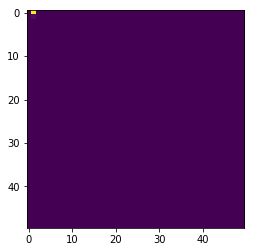

In [156]:
imshow(abs(twodrep(states[:,0]))**2)

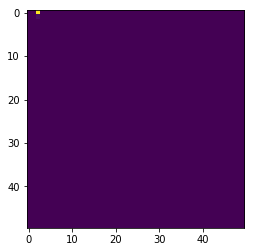

In [157]:
imshow(abs(twodrep(states[:,1]))**2)

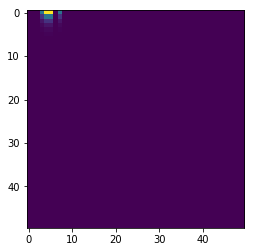

In [158]:
imshow(abs(twodrep(states[:,2]))**2)

These last two state are degenerate

In [159]:
print(energies[1],energies[2])

(-1499.9999999999993, 2204.9150281252673)


Thus linear combinations are also eigenstates:

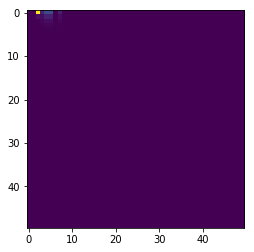

In [160]:
imshow(abs(twodrep(states[:,1]+states[:,2]))**2)

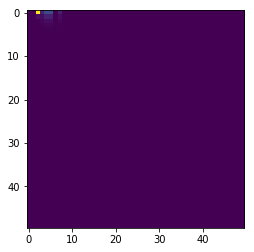

In [161]:
imshow(abs(twodrep(states[:,1]-states[:,2]))**2)

For fun, here is a higher mode

In [162]:
en,st=eigsh(boxham, k=1, sigma=520., return_eigenvectors=True)

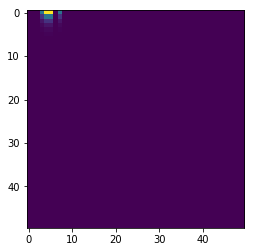

In [163]:
imshow(abs(twodrep(st[:,0]))**2)

## Potentials

Suppose we have a 2D potential on our grid.  For example, here is a 2D harmonic oscillator potential on a grid running from -2 to 2 in steps of 0.5

In [164]:
potvals=array([[(x**2+y**2)/2 for x in arange(-2,2,0.5)] 
               for y in arange(-2,2,0.5)])

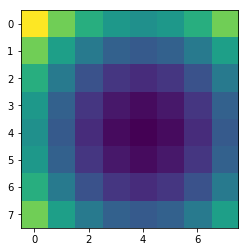

In [165]:
imshow(potvals)

To make the potential matrix we first "unwrap" this grid into a linear list of numbers.  First we need to know how many pixels we have.

In [166]:
numpixels=product(potvals.shape)
numpixels

64

We unwrap them via

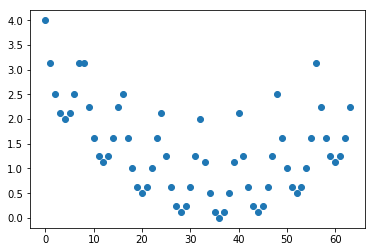

In [167]:
unwrapped=potvals.reshape(numpixels)
plot(unwrapped,"o")

Our potential matrix will be a 64x64 matrix that when applied to the 64 values of psi, multiplies each of them by $V$ at that site

In [168]:
potmat=dia_matrix((unwrapped,0),shape=[numpixels,numpixels])

In [169]:
showmat(potmat.todense())

4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,3.12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,2.5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,2.12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,2.12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,2.5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,3.12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,3.12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,2.25,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,1.62,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


We can encapsulate this via

In [170]:
def makepotmat(potvals):
    numpixels=product(potvals.shape)
    unwrapped=potvals.reshape(numpixels)
    return dia_matrix((unwrapped,0),shape=[numpixels,numpixels])

## Problem

Numerically find the energies of the first 5 eigenstates of a 2D Harmonic Oscillator.  Use a 40x40 grid with $x$ running from -4 to 4 in steps of 0.2, and y running from -4 to 4 in steps of 0.2.  Use units where the mass, $\hbar$ and $\omega$ are all 1.  

In [175]:
potvals=array([[(x**2+y**2)/2 for x in arange(-4,4,0.2)] 
               for y in arange(-4,4,0.2)])
pot = makepotmat(potvals)
harmosc=csc_matrix(-0.5*makelaplacematrix(40,0.02)+pot)

In [178]:
energies,states=eigsh(boxham, k=10, sigma=0., return_eigenvectors=True)

In [179]:
states

array([[ 2.32342248e-18, -3.29686806e-18, -1.28623880e-17, ...,
         6.60358794e-14,  1.31692485e-13, -3.78994203e-14],
       [ 8.94565341e-01, -3.99690944e-01, -7.32848625e-17, ...,
         1.85994100e-14,  1.20960847e-13, -7.83122633e-14],
       [ 3.99690944e-01,  8.94565341e-01,  2.35919551e-17, ...,
         8.58090640e-15,  6.05130320e-14, -3.84166218e-14],
       ...,
       [ 3.00690764e-18, -1.43398703e-18, -6.97753488e-17, ...,
        -2.79447452e-15, -3.50719995e-15,  1.44136555e-15],
       [-3.06250823e-18,  3.15459815e-19,  3.50773808e-17, ...,
        -3.61999417e-14, -7.33285668e-14,  2.07497793e-14],
       [-6.16657764e-19,  8.14882447e-18, -4.12906822e-17, ...,
        -1.00021463e-14, -2.02825966e-14,  5.75899450e-15]])